# Dataset Spatial operation methods

<p align="center">
    <img src="../../docs/source/_images/schemes/spatial-operation.png" alt= "dataset prperties" width=150 height=300>
</p>

In [29]:
# NBVAL_IGNORE_OUTPUT
from pyramids.dataset import Dataset
path = "../../examples/data/dem/DEM5km_Rhine_burned_fill.tif"

In [30]:
dataset = Dataset.read_file(path)

In [31]:
print(dataset)


            Top Left Corner: (32239263.70388, 5756081.42235)
            Cell size: 5000.0
            Dimension: 125 * 93
            EPSG: 4647
            Number of Bands: 1
            Band names: ['Band_1']
            Band colors: {0: 'gray_index'}
            Band units: ['']
            Scale: [1.0]
            Offset: [0]
            Mask: -3.4028234663852886e+38
            Data type: float32
            File: ../../examples/data/dem/DEM5km_Rhine_burned_fill.tif
        


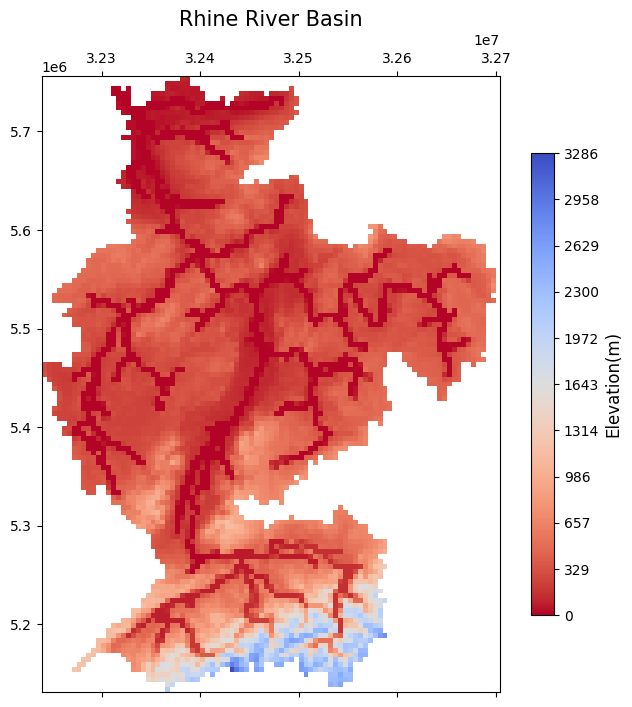

In [32]:
dataset.plot(vmin=0, title="Rhine River Basin", cbar_label="Elevation(m)")

### Resampling

In [33]:
print(f"Cell size: {dataset.cell_size}")

Cell size: 5000.0


In [34]:
dataset_8km = dataset.resample(cell_size=8000, method="bilinear")

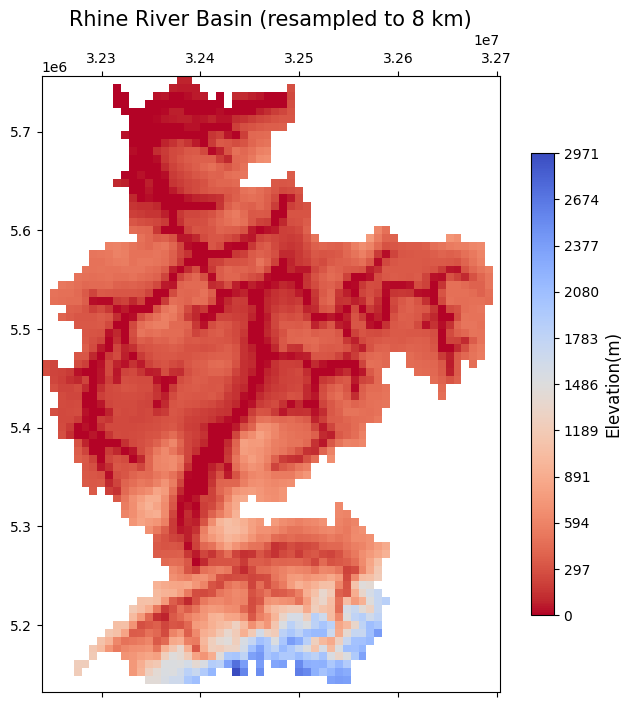

In [35]:
dataset_8km.plot(vmin=0, title="Rhine River Basin (resampled to 8 km)", cbar_label="Elevation(m)")

### Reproject

In [36]:
print(f"EPSG: {dataset.epsg}")
print(f"Coordinate reference system: {dataset.crs}")
print(f"Dataset dimensions: {dataset.shape}")

EPSG: 4647
Coordinate reference system: PROJCS["ETRS89 / UTM zone 32N (zE-N)",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","4647"]]
Dataset dimensions: (1, 125, 93)


In [37]:
resampled_dataset = dataset.to_crs(4326)

In [38]:
print(resampled_dataset)


            Top Left Corner: (5.210230290109742, 51.9554111793825)
            Cell size: 0.05475332958287695
            Dimension: 104 * 123
            EPSG: 4326
            Number of Bands: 1
            Band names: ['Band_1']
            Band colors: {0: 'gray_index'}
            Band units: ['']
            Scale: [1.0]
            Offset: [0.0]
            Mask: -3.4028234663852886e+38
            Data type: float32
            File: 
        


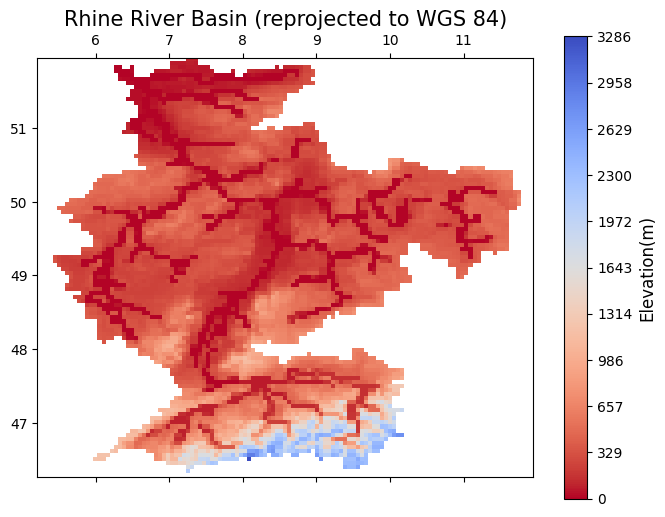

In [39]:
resampled_dataset.plot(vmin=0, title="Rhine River Basin (reprojected to WGS 84)", cbar_label="Elevation(m)")

### Crop/Clip

In [40]:
path = "../../examples/data/geotiff/noah-precipitation-1979-europe.tif"
meteo_data = Dataset.read_file(path)

In [41]:
print(meteo_data)


            Top Left Corner: (-5.0, 55.0)
            Cell size: 0.5
            Dimension: 25 * 40
            EPSG: 4326
            Number of Bands: 4
            Band names: ['Band_1', 'Band_2', 'Band_3', 'Band_4']
            Band colors: {0: 'gray_index', 1: 'undefined', 2: 'undefined', 3: 'undefined'}
            Band units: ['', '', '', '']
            Scale: [1.0, 1.0, 1.0, 1.0]
            Offset: [0, 0, 0, 0]
            Mask: -9.969209968386869e+36
            Data type: float32
            File: ../../examples/data/geotiff/noah-precipitation-1979-europe.tif
        


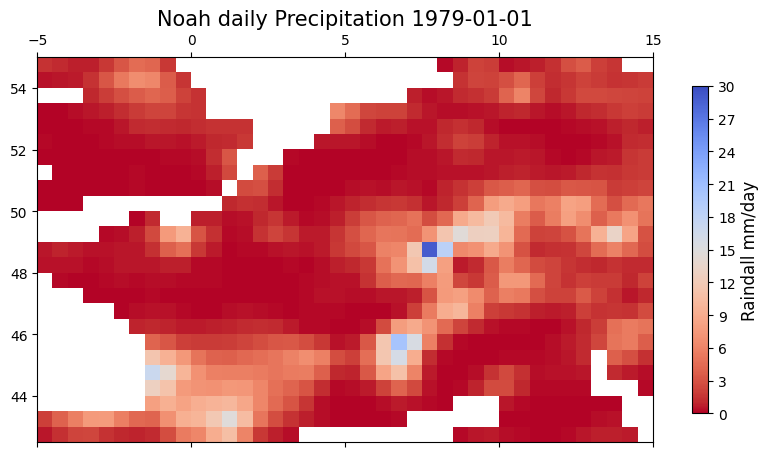

In [42]:
array_glyph = meteo_data.plot(
    band=0, figsize=(10, 5), title="Noah daily Precipitation 1979-01-01", cbar_label="Raindall mm/day", vmax=30,
    cbar_length=0.85
)

In [43]:
meteo_data_r = meteo_data.to_crs(4647)

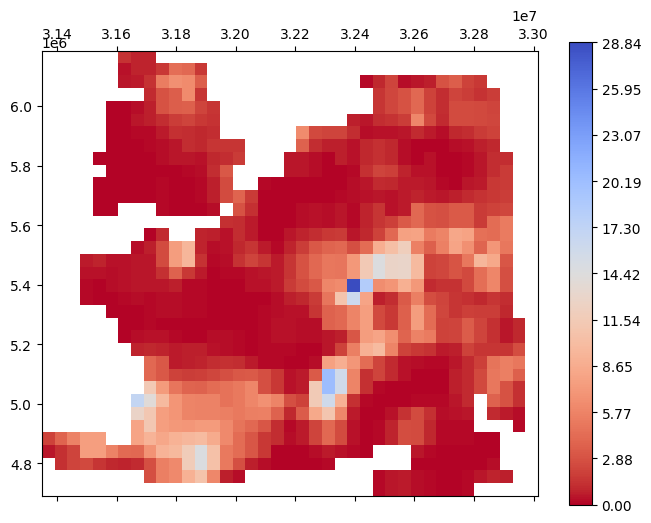

In [44]:
meteo_data_r.plot(band=0)

In [45]:
rhine_meteo_data = meteo_data_r.crop(dataset)

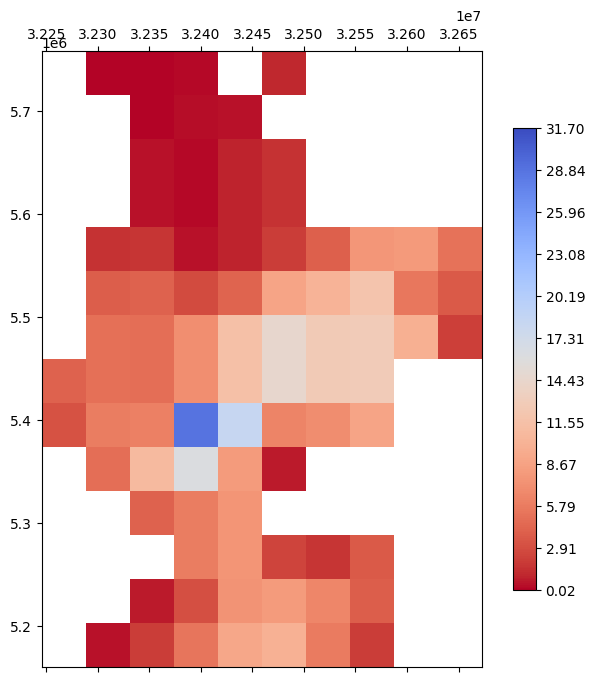

In [46]:
rhine_meteo_data.plot(band=0)

In [47]:
rhine_meteo_data

Driver: MEM/In Memory raster, vector and multidimensional raster
Files: none associated
Size is 10, 14
Coordinate System is:
PROJCRS["ETRS89 / UTM zone 32N (zE-N)",
    BASEGEOGCRS["ETRS89",
        DATUM["European Terrestrial Reference System 1989",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4258]],
    CONVERSION["unnamed",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",9,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",32500000,
            LENGT